In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise: Convolution through the heat equation

In this exercise we'll explore the relation between the heat equation and convolution with a Gaussian kernel. Specifically, we'll see that the linear operation $f = Ku$ defined by the initial-value problem
$$v_t = v_{xx}, \quad v(0,x) = u(x), \quad f(x) = v(1,x),$$
is given by
$$Ku(x) = \frac{1}{2\sqrt{\pi}}\int_{\mathbb{R}} u(x') \exp(-(x - x')^2/4) \mathrm{d}x'.$$

1. Verify that the solution to the heat equation is given by
$$v(t,x) = \int_{\mathbb{R}} u(x') g_t(x - x')\mathrm{d}x',$$
where $g_t(x)$ is the *heat-kernel*:
$$g_t(x) = \frac{1}{2\sqrt{\pi t}}\exp(-(x/2)^2/t).$$
You may use here that $g_t(x)$ converges (in the sense of distributions) to $\delta(x)$ as $t \downarrow 0$.

2. Is the operator bounded? compact? self-adjoint?

We can use the [convolution theorem](https://en.wikipedia.org/wiki/Convolution_theorem) to represent the operator as
$$Ku = F^{-1}((Fu)\cdot(Fg_1)),$$
where $\cdot$ denotes point-wise multiplication and $F$ denotes the [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform)
$$Fu(\xi) = \int_{\mathbb{R}} u(x) e^{\imath 2\pi \xi x} {\mathrm{d}}x,$$
with inverse
$$F^{-1}\widehat{u}(x) = \int_{\mathbb{R}} \widehat{u}(\xi) e^{-\imath 2\pi\xi x} {\mathrm{d}}\xi.$$

3. Express the inverse of $K$ as a convolution with another filter $h$. 4. How does ill-posed manifest itself here?

4. Can you come up with a regularized filter $h_{\alpha}$ ?

5. We can experiment with the inverse problem by using a discrete Fourier transform. Implement the inverse operator and the regularized inverse and show the effect of regularization.

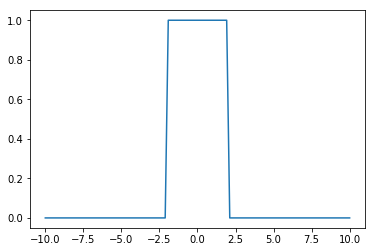

In [2]:
n = 100
x = np.linspace(-10,10,n)

u = np.heaviside(2-np.abs(x),1)
g = np.exp(-x**2/4)

f = np.fft.irfft(np.fft.rfft(u)*np.fft.rfft(g))

plt.plot(x,u)

## Exercise: L1 Deblurring via the convolution theorem

For given data $f$ and a convolution kernel $k$ we study the following regularized variational method:
$$ \left\| k \ast u - f \right\|_{L^2(\Omega)}^2 \:+\: \alpha \: \int_\Omega | (\mathcal{F}u)(w) | \: dw ~ \rightarrow ~ \min_{u} $$
where $(\mathcal{F}u)(w)$ denotes the Fourier transform of $u$ at wave number $w$. Similar to the lecture, find an explicit representation of the solution of the problem using the [convolution theorem](https://en.wikipedia.org/wiki/Convolution_theorem) and the [Plancherel theorem](https://en.wikipedia.org/wiki/Plancherel_theorem). For simplicity you can assume that everything is real valued.

Hint: The derivative of the absolute value function is multivalued (you need cases).